# What does my target market want?

So many different amentiies - how do I decide which will make the most impact. Which are important / non-neogiable. Which ones can I leverage to differentiate myslef from the market

# Step 1: Gather

To answer these questions I will be using the 'calendar.csv' and 'reviews.csv' datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

# Step 2: Assess

I want to look at the amenities to include in my AirBnb and which ones are important - only AirBnBs that are doing well. These are the listings are are being booked - and the ones which are making money. 

In [20]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Columns of interest are amenities, price and availability_365

# Step 3: Clean

i want price

In [7]:
#Clean price
df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_3525/1727424006.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")


In [8]:
#Take a look at the amenities of the current listings
df_amenities = df_listings['amenities'].value_counts().reset_index()
df_amenities.head()

index  amenities
0                                                 {}         45
1  {Internet,"Wireless Internet",Kitchen,"Free Pa...         11
2  {TV,"Cable TV",Internet,"Wireless Internet",Po...         10
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...          8
4  {TV,Internet,"Wireless Internet","Air Conditio...          7

In [9]:
# The items are grouped together if the listing contains more than one amenity. 
# We need to clean this up by plsitting the list items into rows
df_listings['amenities'] = df_listings['amenities'].str.replace('"', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_3525/751898603.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_3525/751898603.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')


In [21]:
# Function to get total count of a column with lists

def total_count(df, col):
    
    count_rows = df.shape[0]
    
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    new_df[col] = new_df[col].str.split(",")
    new_df = new_df.explode(col).reset_index(drop=True)
    new_df = new_df.groupby([col]).sum()['count'].reset_index()
    new_df = new_df.sort_values('count', ascending=False)
    new_df['perc'] = new_df['count']/count_rows
    
    return new_df

In [23]:
df_total = total_count(df_listings, 'amenities')
df_total

amenities  count      perc
49                      Heating   3611  0.945783
54                      Kitchen   3380  0.885280
36          "Wireless Internet"   3342  0.875327
29             "Smoke Detector"   3254  0.852279
59                       Washer   2990  0.783133
..                          ...    ...       ...
64  {"Free Parking on Premises"      1  0.000262
8       "Elevator in Building"}      1  0.000262
33       "Suitable for Events"}      1  0.000262
70                    {Kitchen}      1  0.000262
71                        {Pool      1  0.000262

[74 rows x 3 columns]

Much better way of seeing which amenities are important.

# Step 4: Analyze

I care more about the propoties of listings that are doing well. need a metric to compare it against. 

In [25]:
# My new metric
df_listings['EstimatedIncome'] = df_listings['price'] * (365-df_listings['availability_365'])
df_listings['EstimatedIncome'] 

0       $85.00$85.00$85.00$85.00$85.00$85.00$85.00$85....
1       $150.00$150.00$150.00$150.00$150.00$150.00$150...
2       $975.00$975.00$975.00$975.00$975.00$975.00$975...
3       $100.00$100.00$100.00$100.00$100.00$100.00$100...
4                                                        
                              ...                        
3813    $359.00$359.00$359.00$359.00$359.00$359.00$359...
3814    $79.00$79.00$79.00$79.00$79.00$79.00$79.00$79....
3815    $93.00$93.00$93.00$93.00$93.00$93.00$93.00$93....
3816    $99.00$99.00$99.00$99.00$99.00$99.00$99.00$99....
3817    $87.00$87.00$87.00$87.00$87.00$87.00$87.00$87....
Name: EstimatedIncome, Length: 3818, dtype: object

In [ ]:
#label = df_listings["reviews_per_month"]
label = df_listings["EstimatedIncome"]
fig, ax = plt.subplots(1, 1, figsize = (9,4.5))

# Plot the histogram   
ax.hist(label, bins=100)
ax.set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Add a title to the Figure
fig.suptitle('Estimated annual income')


TypeError: Could not convert $85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$975.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$245.00$245.00$245.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$461.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$66.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$700.00$700.00$700.00$700.00$700.00$700.00$110.00$110.00$110.00$110.00$110.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$222.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$45.00$45.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$20.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$80.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$465.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$59.00$59.00$59.00$59.00$59.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$50.00$50.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$65.00$375.00$375.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$197.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$195.00$195.00$195.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$338.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$149.00$149.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$75.00$75.00$75.00$75.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$70.00$70.00$70.00$70.00$70.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$50.00$50.00$50.00$50.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$120.00$120.00$120.00$120.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$130.00$130.00$130.00$130.00$130.00$130.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$749.00$749.00$749.00$749.00$749.00$749.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$235.00$235.00$235.00$235.00$235.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$60.00$60.00$60.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$499.00$499.00$499.00$499.00$499.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$156.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$149.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$199.00$199.00$199.00$199.00$199.00$199.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$90.00$90.00$90.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$70.00$70.00$70.00$99.00$99.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$680.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$75.00$75.00$75.00$75.00$75.00$126.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$40.00$50.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$40.00$120.00$120.00$120.00$120.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$575.00$40.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$70.00$70.00$70.00$70.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$166.00$166.00$166.00$166.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$200.00$200.00$200.00$200.00$200.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$40.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$85.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$105.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$40.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$40.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$145.00$145.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$254.00$254.00$254.00$254.00$254.00$254.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$40.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$75.00$75.00$75.00$75.00$75.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$490.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$255.00$95.00$95.00$95.00$95.00$95.00$95.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$175.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$50.00$50.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$445.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$53.00$53.00$53.00$53.00$53.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$348.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$116.00$150.00$150.00$150.00$150.00$150.00$150.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$99.00$99.00$99.00$99.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$160.00$160.00$160.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$75.00$75.00$75.00$75.00$75.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$111.00$111.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$141.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$775.00$775.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$275.00$275.00$275.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$55.00$55.00$55.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$80.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$80.00$80.00$80.00$80.00$80.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$135.00$135.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$500.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$109.00$109.00$109.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$85.00$85.00$85.00$85.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$78.00$78.00$78.00$78.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$70.00$70.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$85.00$85.00$85.00$85.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$89.00$89.00$89.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$306.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$85.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$88.00$88.00$88.00$88.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$203.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$79.00$79.00$79.00$79.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$67.00$67.00$67.00$67.00$67.00$67.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$79.00$79.00$79.00$79.00$79.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$60.00$60.00$60.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$75.00$75.00$75.00$75.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$69.00$69.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$120.00$120.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$287.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$257.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$163.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$44.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$80.00$80.00$80.00$80.00$80.00$80.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$35.00$35.00$35.00$35.00$35.00$35.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$70.00$70.00$70.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$76.00$76.00$76.00$76.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$137.00$137.00$137.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$557.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$165.00$165.00$165.00$165.00$165.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$311.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$357.00$357.00$357.00$357.00$357.00$357.00$357.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$140.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$85.00$85.00$85.00$85.00$85.00$85.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$600.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$82.00$82.00$82.00$82.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$229.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$333.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$70.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$225.00$225.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$480.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$999.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$126.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$157.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$197.00$197.00$197.00$197.00$197.00$197.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$150.00$150.00$150.00$150.00$156.00$156.00$156.00$156.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$320.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$405.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$899.00$899.00$899.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$117.00$117.00$117.00$117.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$131.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$89.00$89.00$89.00$89.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$99.00$99.00$99.00$99.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$113.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$700.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$475.00$143.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$205.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$139.00$139.00$139.00$139.00$139.00$139.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$181.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$143.00$143.00$143.00$143.00$143.00$143.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$193.00$193.00$193.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$444.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$186.00$171.00$171.00$171.00$181.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$165.00$165.00$165.00$165.00$165.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$335.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$167.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$120.00$120.00$120.00$120.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$425.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$130.00$130.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$197.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$89.00$89.00$89.00$89.00$89.00$89.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$166.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$187.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$250.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$139.00$139.00$139.00$139.00$139.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$156.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$135.00$135.00$135.00$128.00$128.00$128.00$128.00$128.00$128.00$104.00$104.00$104.00$104.00$104.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$132.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$126.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$143.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$129.00$129.00$129.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$175.00$175.00$175.00$175.00$144.00$144.00$144.00$144.00$144.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$150.00$150.00$150.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$276.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$147.00$147.00$147.00$147.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$129.00$129.00$129.00$129.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$230.00$230.00$230.00$127.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$117.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$142.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$237.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$156.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$125.00$125.00$125.00$125.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$109.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$230.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$121.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$65.00$65.00$65.00$65.00$65.00$65.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$151.00$175.00$175.00$175.00$175.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$110.00$110.00$110.00$110.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$179.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$160.00$160.00$160.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$128.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$175.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$149.00$149.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$149.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$160.00$160.00$160.00$160.00$160.00$170.00$170.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$153.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$54.00$54.00$54.00$54.00$54.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$225.00$225.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$269.00$325.00$325.00$325.00$325.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$450.00$450.00$450.00$219.00$219.00$219.00$219.00$219.00$219.00$219.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$200.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$195.00$195.00$195.00$105.00$105.00$105.00$105.00$105.00$105.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$65.00$65.00$65.00$65.00$65.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$65.00$65.00$65.00$65.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$75.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$125.00$125.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$75.00$75.00$117.00$117.00$117.00$117.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$200.00$129.00$129.00$129.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$75.00$75.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$249.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$30.00$30.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$99.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$265.00$150.00$150.00$150.00$150.00$150.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$45.00$45.00$45.00$45.00$45.00$80.00$80.00$80.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$44.00$44.00$44.00$44.00$44.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$26.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$50.00$50.00$50.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$68.00$68.00$68.00$68.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$51.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$109.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$75.00$75.00$75.00$75.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$60.00$60.00$60.00$60.00$60.00$60.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$138.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$270.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$495.00$165.00$165.00$165.00$165.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$177.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$399.00$399.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$275.00$39.00$105.00$105.00$105.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$41.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$110.00$110.00$110.00$110.00$110.00$110.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$49.00$49.00$49.00$49.00$49.00$49.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$244.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$150.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$88.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$60.00$60.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$65.00$65.00$65.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$195.00$195.00$195.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$150.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$72.00$72.00$72.00$72.00$72.00$72.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$124.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$72.00$72.00$72.00$72.00$72.00$72.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$95.00$95.00$95.00$95.00$95.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$74.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$80.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$150.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$92.00$92.00$92.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$81.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$34.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$41.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$188.00$188.00$188.00$188.00$188.00$188.00$188.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$75.00$75.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$168.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$279.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$65.00$65.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$95.00$95.00$95.00$95.00$95.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$47.00$47.00$47.00$47.00$47.00$47.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$148.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$55.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$75.00$75.00$75.00$75.00$75.00$75.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$137.00$137.00$137.00$137.00$137.00$137.00$137.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$65.00$65.00$65.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$37.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$93.00$93.00$93.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$280.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$45.00$45.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$127.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$28.00$110.00$110.00$110.00$110.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$84.00$84.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$196.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$525.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$380.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$66.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$79.00$79.00$79.00$79.00$79.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$80.00$80.00$80.00$80.00$95.00$95.00$95.00$95.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$62.00$62.00$62.00$62.00$62.00$62.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$180.00$180.00$180.00$180.00$180.00$180.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$415.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$750.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$122.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$162.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$119.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$147.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$256.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$150.00$150.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$395.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$210.00$210.00$210.00$210.00$210.00$210.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$81.00$81.00$81.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$155.00$155.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$120.00$120.00$120.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$245.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$58.00$58.00$58.00$58.00$58.00$100.00$100.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$114.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$89.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$89.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$155.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$190.00$190.00$190.00$190.00$190.00$190.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$58.00$58.00$58.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$174.00$78.00$78.00$78.00$78.00$78.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$175.00$175.00$175.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$167.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$259.00$259.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$182.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$550.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$119.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$360.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$68.00$68.00$68.00$68.00$68.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$111.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$198.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$126.00$99.00$99.00$99.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$104.00$104.00$104.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$673.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$63.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$200.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$134.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$120.00$120.00$120.00$120.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$204.00$295.00$295.00$295.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$420.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$25.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$169.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$90.00$90.00$90.00$90.00$90.00$90.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$110.00$110.00$110.00$110.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$152.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$110.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$126.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$159.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$144.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$49.00$49.00$49.00$49.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$55.00$55.00$55.00$55.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$60.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$46.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$55.00$55.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$135.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$435.00$110.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$47.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$69.00$69.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$106.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$51.00$51.00$51.00$51.00$51.00$51.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$87.00$87.00$87.00$87.00$87.00$87.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$159.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$91.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$70.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$252.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$71.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$105.00$105.00$105.00$105.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$60.00$60.00$60.00$60.00$60.00$60.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$118.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$47.00$47.00$47.00$47.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$89.00$89.00$89.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$130.00$130.00$130.00$130.00$130.00$130.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$42.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$56.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$62.00$95.00$95.00$95.00$95.00$95.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$40.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$209.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$1,000.00$1,000.00$1,000.00$1,000.00$1,000.00$1,000.00$1,000.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$94.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$103.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$498.00$498.00$498.00$498.00$498.00$110.00$110.00$110.00$110.00$110.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$217.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$103.00$103.00$103.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$259.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$310.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$38.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$145.00$145.00$145.00$145.00$145.00$145.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$75.00$75.00$75.00$75.00$75.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$299.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$210.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$171.00$171.00$171.00$171.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$170.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$64.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$190.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$55.00$55.00$55.00$55.00$55.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$92.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$50.00$50.00$50.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$75.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$125.00$125.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$36.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$199.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$73.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$70.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$189.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$375.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$325.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$88.00$88.00$88.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$250.00$207.00$207.00$207.00$207.00$207.00$207.00$207.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$120.00$120.00$120.00$120.00$120.00$120.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$239.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$151.00$151.00$151.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$400.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$50.00$50.00$50.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$145.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$349.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$52.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$100.00$100.00$100.00$100.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$96.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$130.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$228.00$228.00$228.00$228.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$225.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$250.00$250.00$250.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$48.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$330.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$72.00$72.00$72.00$72.00$72.00$72.00$72.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$78.00$78.00$78.00$78.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$49.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$79.00$79.00$79.00$79.00$79.00$79.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$70.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$70.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$105.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$58.00$150.00$150.00$150.00$150.00$55.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$53.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$285.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$275.00$275.00$275.00$275.00$275.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$215.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$104.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$33.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$27.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$90.00$90.00$90.00$90.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$99.00$99.00$99.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$139.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$399.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$104.00$125.00$125.00$125.00$125.00$125.00$125.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$545.00$250.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$22.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$250.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$220.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$165.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$88.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$295.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$158.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$50.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$29.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$135.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$449.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$92.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$30.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$31.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$85.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$98.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$67.00$67.00$67.00$67.00$67.00$67.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$183.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$39.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$86.00$39.00$39.00$39.00$39.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$84.00$150.00$150.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$82.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$140.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$138.00$138.00$138.00$138.00$138.00$138.00$138.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$180.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$136.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$129.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$61.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$500.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$35.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$57.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$54.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$43.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$69.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$97.00$45.00$45.00$45.00$45.00$45.00$45.00$45.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$450.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$49.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$195.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$300.00$200.00$200.00$200.00$200.00$200.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$52.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$75.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$100.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$60.00$150.00$150.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$275.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$89.00$89.00$89.00$89.00$89.00$89.00$89.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$67.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$115.00$115.00$115.00$115.00$115.00$210.00$210.00$210.00$210.00$210.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$195.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$59.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$112.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$235.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$62.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$119.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$400.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$225.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$240.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$350.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$150.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$76.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$78.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$50.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$135.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$105.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$325.00$325.00$325.00$325.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$149.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$120.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$68.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$55.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$90.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$110.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$80.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$260.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$115.00$60.00$60.00$60.00$60.00$60.00$60.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$107.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$85.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$70.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$77.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$185.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$108.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$200.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$250.00$125.00$125.00$125.00$125.00$125.00$125.00$125.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$100.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$160.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$109.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$175.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$154.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$65.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$95.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$359.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$79.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$93.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$99.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00$87.00 to numeric

In [ ]:
df_listings["EstimatedIncome"].describe()

In [24]:
#Lets check what the top 75% of people are doing/ have

df_Top75 = df_listings[(df_listings["EstimatedIncome"] >= 23622.500000)]
df_Top75["amenities"]

KeyError: 'EstimatedIncome'

In [16]:
df_theTop = total_count(df_Top75, "amenities")

In [17]:
df_combined = pd.merge(df_total, df_theTop, on='amenities', how = 'inner')
df_combined['diff'] = df_combined['perc_y'] - df_combined['perc_x']
df_combined.sort_values('diff', ascending =False)

amenities  count_x    perc_x  count_y    perc_y      diff
9                           TV     2574  0.674175      742  0.776963  0.102788
13         Family/Kid Friendly     1963  0.514144      581  0.608377  0.094233
19        Elevator in Building      785  0.205605      286  0.299476  0.093871
10    Carbon Monoxide Detector     2485  0.650864      681  0.713089  0.062225
7                     Internet     2811  0.736249      756  0.791623  0.055374
23                 Safety Card      727  0.190414      234  0.245026  0.054612
2                      Kitchen     3423  0.896543      908  0.950785  0.054243
29                         Gym      442  0.115767      161  0.168586  0.052819
5                        Dryer     2997  0.784966      799  0.836649  0.051683
6                       Washer     2992  0.783656      795  0.832461  0.048804
26    Buzzer/Wireless Intercom      538  0.140911      177  0.185340  0.044429
32       Wheelchair Accessible      300  0.078575      113  0.118325  0.039749
3               Smoke Detector     3281  0.859350      858  0.898429  0.039079
24            Air Conditioning      677  0.177318      200  0.209424  0.032106
4                   Essentials     3237  0.847826      838  0.877487  0.029661
22                        Iron      742  0.194343      212  0.221990  0.027647
21   Laptop Friendly Workspace      745  0.195128      211  0.220942  0.025814
20                  Hair Dryer      774  0.202724      218  0.228272  0.025548
18                     Hangers      846  0.221582      234  0.245026  0.023444
16            Indoor Fireplace      886  0.232059      240  0.251309  0.019250
28                Pets Allowed      472  0.123625      136  0.142408  0.018783
25            24-Hour Check-in      616  0.161341      172  0.180105  0.018764
37                     Doorman       85  0.022263       37  0.038743  0.016480
15                    Cable TV     1446  0.378732      374  0.391623  0.012891
8                      Shampoo     2670  0.699319      680  0.712042  0.012723
31                     Hot Tub      303  0.079361       84  0.087958  0.008597
12    Free Parking on Premises     2167  0.567575      548  0.573822  0.006247
0            Wireless Internet     3667  0.960450      923  0.966492  0.006042
35                        Pool      159  0.041645       45  0.047120  0.005476
39                Other pet(s)       51  0.013358       14  0.014660  0.001302
1                      Heating     3627  0.949974      906  0.948691 -0.001283
11           Fire Extinguisher     2196  0.575170      548  0.573822 -0.001348
40                                   45  0.011786        9  0.009424 -0.002362
34         Suitable for Events      209  0.054741       46  0.048168 -0.006573
38             Smoking Allowed       82  0.021477        9  0.009424 -0.012053
36        Lock on Bedroom Door      100  0.026192        9  0.009424 -0.016768
14               First Aid Kit     1680  0.440021      399  0.417801 -0.022220
30                      Cat(s)      382  0.100052       74  0.077487 -0.022565
27                      Dog(s)      509  0.133316      101  0.105759 -0.027557
33                   Breakfast      291  0.076218       39  0.040838 -0.035380
17  Pets live on this property      883  0.231273      175  0.183246 -0.048027

# Step 5: Visualise

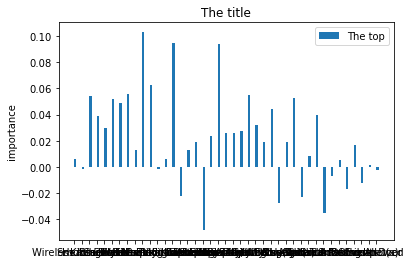

In [18]:
x = np.arange(len(df_combined['amenities']))
width = 0.3

labels = df_combined['amenities']
y1 = df_combined['perc_x']
y2 = df_combined['perc_y']
y3 = df_combined['diff']


fig, ax = plt.subplots()
#bar1 = ax.bar(x - width/2, y1, width, label='Overall')
#bar2 = ax.bar(x + width/2, y2, width, label='The top')
bar3 = ax.bar(x + width/2, y3, width, label='The top')

ax.set_ylabel('importance')
ax.set_title('The title')
ax.set_xticks(x, labels)
ax.legend()

#ax.bar_label(bar1)
#ax.bar_label(bar2)
#ax.bar_label(bar3)

Conclusion